# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.353792e+01     1.652260e+01
 * time: 0.004258871078491211
     1     6.281896e+01     1.112812e+01
 * time: 0.01211690902709961
     2     5.794394e+01     1.551669e+01
 * time: 0.02979302406311035
     3     4.312845e+01     1.095520e+01
 * time: 0.05404400825500488
     4     3.615960e+01     1.022248e+01
 * time: 0.07776784896850586
     5     1.546842e+01     3.653098e+00
 * time: 0.20224499702453613
     6     1.268943e+01     4.728347e+00
 * time: 0.22024297714233398
     7     9.833871e+00     3.449216e+00
 * time: 0.2372889518737793
     8     7.073146e+00     3.251408e+00
 * time: 0.25440096855163574
     9     6.441603e+00     1.393586e+00
 * time: 0.2719089984893799
    10     6.057512e+00     1.892467e+00
 * time: 0.28569698333740234
    11     5.867350e+00     1.100078e+00
 * time: 0.2996389865875244
    12     5.735520e+00     6.673979e-01
 * time: 0.31353187561035156
    13     5.688729e+00     1.090721e+00
 * time: 0

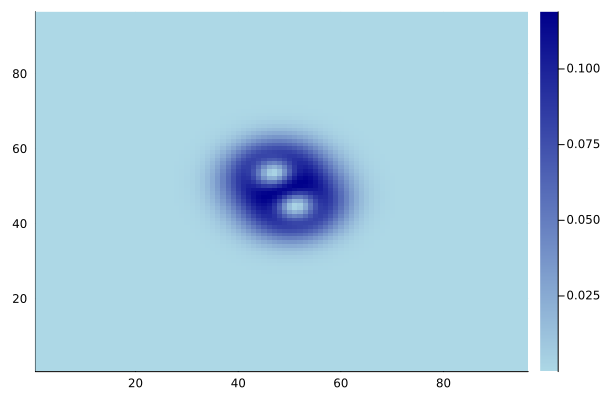

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)